In [1]:
#Determinants of the player's overall score in FIFA22

#Filip Szymański

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import seaborn as sns

In [3]:
# Data imported from:
# https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA22_official_data.csv

In [4]:
fifa = pd.read_csv('FIFA22.csv')
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [5]:
fifa.rename(columns = {'Weak Foot':'WeakFoot', 
                       'Skill Moves':'SkillMoves',
                       'Best Position':'BestPosition'}, 
            inplace = True)

In [6]:
fifa.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
BestPosition            object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [7]:
convert_dict = {'WeakFoot': object,
               'SkillMoves': object}

In [8]:
fifa=fifa.astype(convert_dict)

In [9]:
fifa1=fifa[['Overall','Age',
      'WeakFoot','SkillMoves','Crossing','Finishing',
     'HeadingAccuracy','Volleys','Dribbling','ShortPassing','LongPassing',
     'Acceleration','Agility','ShotPower','Stamina','Strength','Penalties',
     'BestPosition']]
fifa1

,Overall,Age,WeakFoot,SkillMoves,Crossing,Finishing,HeadingAccuracy,Volleys,Dribbling,ShortPassing,LongPassing,Acceleration,Agility,ShotPower,Stamina,Strength,Penalties,BestPosition
0,88,26,3.0,4.0,87.0,83.0,64.0,87.0,83.0,91.0,88.0,77.0,80.0,89.0,91.0,70.0,91.0,CAM
1,87,26,4.0,3.0,75.0,82.0,86.0,69.0,84.0,86.0,84.0,78.0,76.0,85.0,88.0,88.0,60.0,CM
2,88,34,4.0,3.0,80.0,93.0,84.0,90.0,83.0,83.0,77.0,76.0,75.0,89.0,78.0,85.0,83.0,ST
3,91,30,5.0,4.0,94.0,82.0,55.0,82.0,88.0,94.0,93.0,76.0,79.0,91.0,89.0,74.0,83.0,CM
4,84,29,3.0,4.0,87.0,66.0,58.0,68.0,87.0,82.0,78.0,77.0,83.0,82.0,90.0,80.0,76.0,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,53,17,2.0,1.0,12.0,5.0,13.0,7.0,12.0,18.0,19.0,15.0,34.0,16.0,26.0,57.0,18.0,GK
16706,53,20,2.0,1.0,13.0,7.0,10.0,7.0,6.0,17.0,28.0,16.0,30.0,40.0,24.0,32.0,12.0,GK
16707,47,19,2.0,1.0,12.0,9.0,14.0,6.0,8.0,15.0,14.0,22.0,36.0,34.0,20.0,51.0,15.0,GK
16708,47,18,3.0,1.0,13.0,8.0,10.0,8.0,10.0,22.0,18.0,20.0,26.0,29.0,19.0,34.0,19.0,GK


In [10]:
fifa2=fifa1.loc[fifa1['BestPosition']!='GK']
fifa2

,Overall,Age,WeakFoot,SkillMoves,Crossing,Finishing,HeadingAccuracy,Volleys,Dribbling,ShortPassing,LongPassing,Acceleration,Agility,ShotPower,Stamina,Strength,Penalties,BestPosition
0,88,26,3.0,4.0,87.0,83.0,64.0,87.0,83.0,91.0,88.0,77.0,80.0,89.0,91.0,70.0,91.0,CAM
1,87,26,4.0,3.0,75.0,82.0,86.0,69.0,84.0,86.0,84.0,78.0,76.0,85.0,88.0,88.0,60.0,CM
2,88,34,4.0,3.0,80.0,93.0,84.0,90.0,83.0,83.0,77.0,76.0,75.0,89.0,78.0,85.0,83.0,ST
3,91,30,5.0,4.0,94.0,82.0,55.0,82.0,88.0,94.0,93.0,76.0,79.0,91.0,89.0,74.0,83.0,CM
4,84,29,3.0,4.0,87.0,66.0,58.0,68.0,87.0,82.0,78.0,77.0,83.0,82.0,90.0,80.0,76.0,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15844,54,23,3.0,1.0,36.0,55.0,47.0,NaN,61.0,51.0,40.0,65.0,NaN,57.0,64.0,55.0,48.0,ST
15869,54,23,3.0,2.0,25.0,23.0,59.0,27.0,25.0,31.0,29.0,39.0,43.0,42.0,39.0,75.0,36.0,CB
15999,44,18,2.0,2.0,26.0,16.0,42.0,15.0,20.0,37.0,34.0,65.0,52.0,23.0,56.0,66.0,32.0,CB
16572,44,38,3.0,1.0,26.0,20.0,41.0,NaN,32.0,51.0,46.0,25.0,NaN,24.0,45.0,54.0,57.0,CM


In [11]:
corr = fifa2.iloc[:,3:16].corr(method='spearman')
corr

,Crossing,Finishing,HeadingAccuracy,Volleys,Dribbling,ShortPassing,LongPassing,Acceleration,Agility,ShotPower,Stamina,Strength
Crossing,1.000000,0.384123,-0.137057,0.450492,0.692372,0.589335,0.546176,0.381286,0.504071,0.468754,0.328314,-0.214575
Finishing,0.384123,1.000000,0.016633,0.831848,0.686744,0.363721,0.169478,0.341247,0.438527,0.710981,0.104383,-0.100154
HeadingAccuracy,-0.137057,0.016633,1.000000,0.059610,-0.121339,0.164430,0.079472,-0.369965,-0.414639,0.212758,0.109618,0.682900
Volleys,0.450492,0.831848,0.059610,1.000000,0.664870,0.427288,0.266441,0.256033,0.406836,0.747431,0.101748,-0.070408
Dribbling,0.692372,0.686744,-0.121339,0.664870,1.000000,0.638881,0.468969,0.499388,0.623418,0.629116,0.264944,-0.241485
ShortPassing,0.589335,0.363721,0.164430,0.427288,0.638881,1.000000,0.841360,0.062801,0.270358,0.542367,0.367035,0.049098
LongPassing,0.546176,0.169478,0.079472,0.266441,0.468969,0.841360,1.000000,-0.041708,0.187850,0.416534,0.350999,0.041007
Acceleration,0.381286,0.341247,-0.369965,0.256033,0.499388,0.062801,-0.041708,1.000000,0.753349,0.154079,0.245793,-0.409767
Agility,0.504071,0.438527,-0.414639,0.406836,0.623418,0.270358,0.187850,0.753349,1.000000,0.280940,0.268940,-0.490307
ShotPower,0.468754,0.710981,0.212758,0.747431,0.629116,0.542367,0.416534,0.154079,0.280940,1.000000,0.223005,0.139432


<AxesSubplot:>

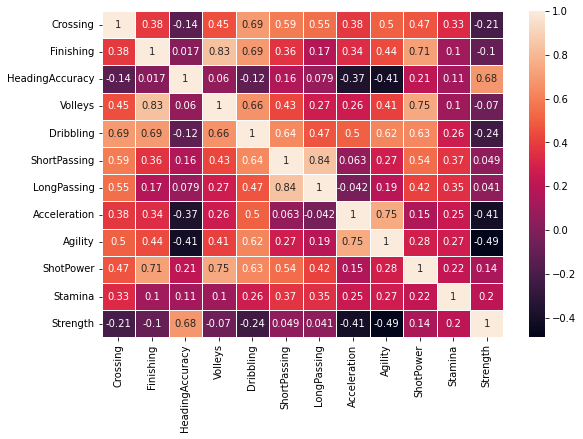

In [12]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=0.6)

In [13]:
fifa3=fifa[['Overall','WeakFoot','SkillMoves',
            'Age','Crossing','Finishing',
            'HeadingAccuracy','ShortPassing',
            'Acceleration','Agility','Stamina',
            'Strength','BestPosition']]

In [14]:
fifa4=fifa3.loc[fifa1['BestPosition']!='GK']
fifa4

,Overall,WeakFoot,SkillMoves,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Acceleration,Agility,Stamina,Strength,BestPosition
0,88,3.0,4.0,26,87.0,83.0,64.0,91.0,77.0,80.0,91.0,70.0,CAM
1,87,4.0,3.0,26,75.0,82.0,86.0,86.0,78.0,76.0,88.0,88.0,CM
2,88,4.0,3.0,34,80.0,93.0,84.0,83.0,76.0,75.0,78.0,85.0,ST
3,91,5.0,4.0,30,94.0,82.0,55.0,94.0,76.0,79.0,89.0,74.0,CM
4,84,3.0,4.0,29,87.0,66.0,58.0,82.0,77.0,83.0,90.0,80.0,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15844,54,3.0,1.0,23,36.0,55.0,47.0,51.0,65.0,NaN,64.0,55.0,ST
15869,54,3.0,2.0,23,25.0,23.0,59.0,31.0,39.0,43.0,39.0,75.0,CB
15999,44,2.0,2.0,18,26.0,16.0,42.0,37.0,65.0,52.0,56.0,66.0,CB
16572,44,3.0,1.0,38,26.0,20.0,41.0,51.0,25.0,NaN,45.0,54.0,CM


In [15]:
corr_matrix2 = fifa4.iloc[:,3:12].corr(method='spearman')
corr_matrix2

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Acceleration,Agility,Stamina,Strength
Age,1.000000,0.314992,0.188964,0.386997,0.351348,-0.209119,-0.025085,0.216719,0.384047
Crossing,0.314992,1.000000,0.384123,-0.137057,0.589335,0.381286,0.504071,0.328314,-0.214575
Finishing,0.188964,0.384123,1.000000,0.016633,0.363721,0.341247,0.438527,0.104383,-0.100154
HeadingAccuracy,0.386997,-0.137057,0.016633,1.000000,0.164430,-0.369965,-0.414639,0.109618,0.682900
ShortPassing,0.351348,0.589335,0.363721,0.164430,1.000000,0.062801,0.270358,0.367035,0.049098
Acceleration,-0.209119,0.381286,0.341247,-0.369965,0.062801,1.000000,0.753349,0.245793,-0.409767
Agility,-0.025085,0.504071,0.438527,-0.414639,0.270358,0.753349,1.000000,0.268940,-0.490307
Stamina,0.216719,0.328314,0.104383,0.109618,0.367035,0.245793,0.268940,1.000000,0.202630
Strength,0.384047,-0.214575,-0.100154,0.682900,0.049098,-0.409767,-0.490307,0.202630,1.000000


<AxesSubplot:>

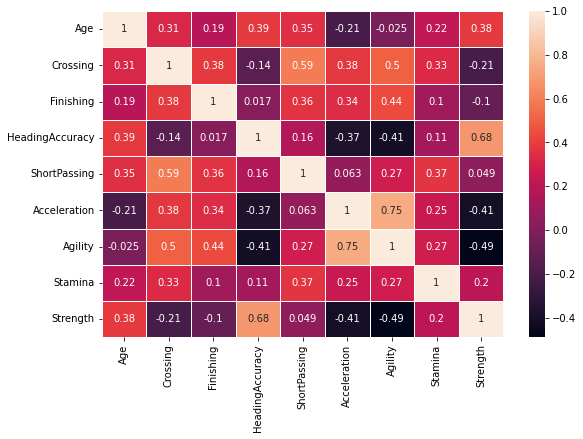

In [16]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix2, annot=True, linewidths=0.6)

In [17]:
reg1 = smf.ols('Overall ~ Age + Crossing + Finishing + HeadingAccuracy + ShortPassing + Acceleration + Agility + Stamina + Strength + WeakFoot + SkillMoves', data=fifa4).fit()

In [18]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3533.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:56:25   Log-Likelihood:                -37657.
No. Observations:               15129   AIC:                         7.535e+04
Df Residuals:                   15112   BIC:                         7.548e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.2893      0.54

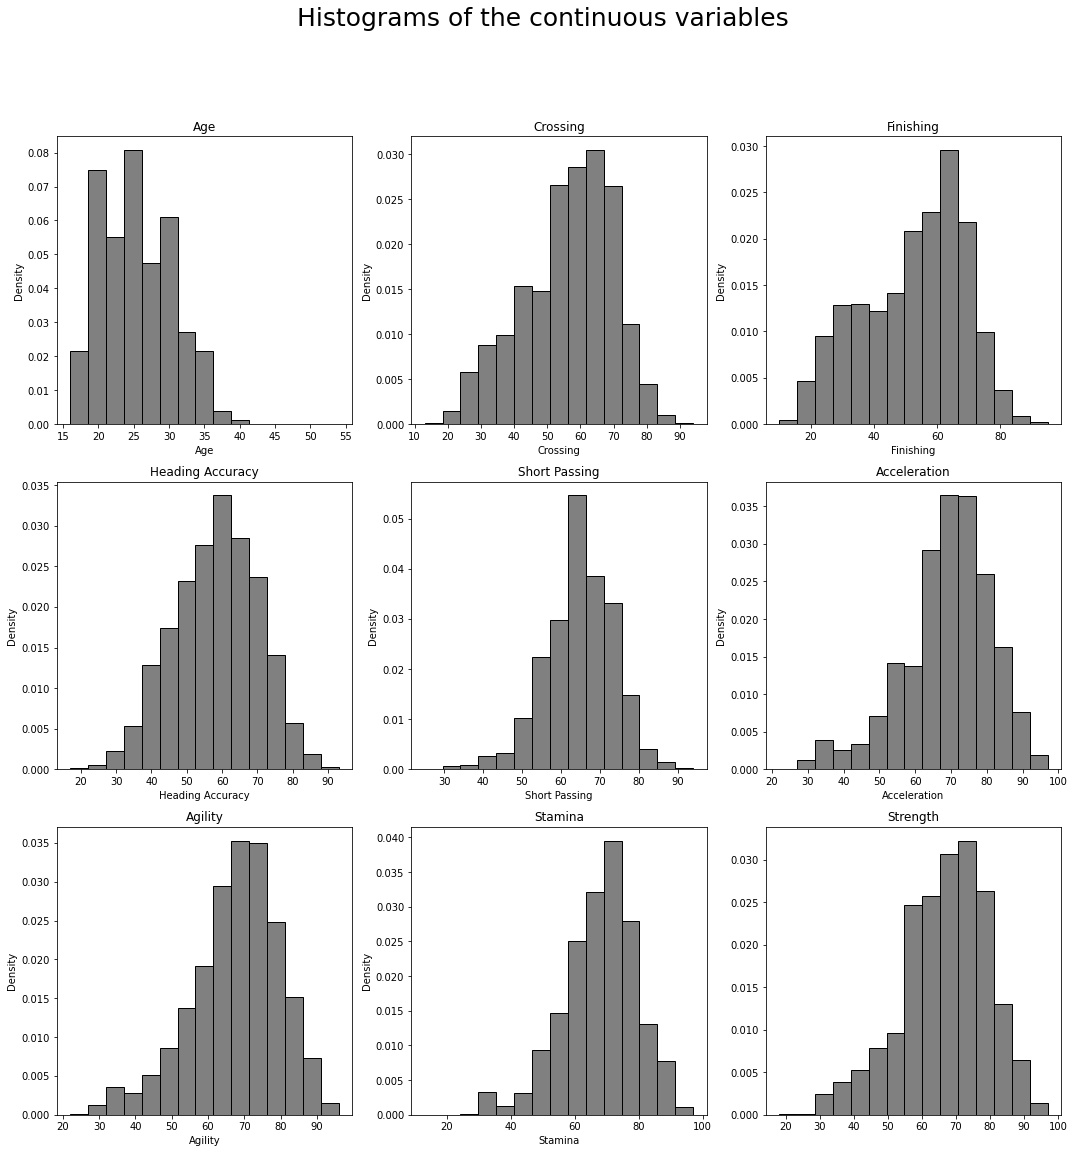

<Figure size 1296x1296 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(18,18))

fig.suptitle('Histograms of the continuous variables', fontsize=25)

ax = fig.add_subplot(3, 3, 1)
ax.set_title("Age")
plt.hist(fifa2['Age'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Age')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 2)
ax.set_title("Crossing")
plt.hist(fifa2['Crossing'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Crossing')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 3)
ax.set_title("Finishing")
plt.hist(fifa2['Finishing'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Finishing')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 4)
ax.set_title("Heading Accuracy")
plt.hist(fifa2['HeadingAccuracy'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Heading Accuracy')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 5)
ax.set_title("Short Passing")
plt.hist(fifa2['ShortPassing'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Short Passing')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 6)
ax.set_title("Acceleration")
plt.hist(fifa2['Acceleration'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Acceleration')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 7)
ax.set_title("Agility")
plt.hist(fifa2['Agility'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Agility')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 8)
ax.set_title("Stamina")
plt.hist(fifa2['Stamina'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
ax.set_xlabel('Stamina')
ax.set_ylabel('Density')

ax = fig.add_subplot(3, 3, 9)
ax.set_title("Strength")
plt.hist(fifa2['Strength'], color = 'grey', edgecolor = 'black',
         density =True, bins = 15)
fig = plt.figure(figsize=(18,18))




Text(0, 0.5, 'Strength')

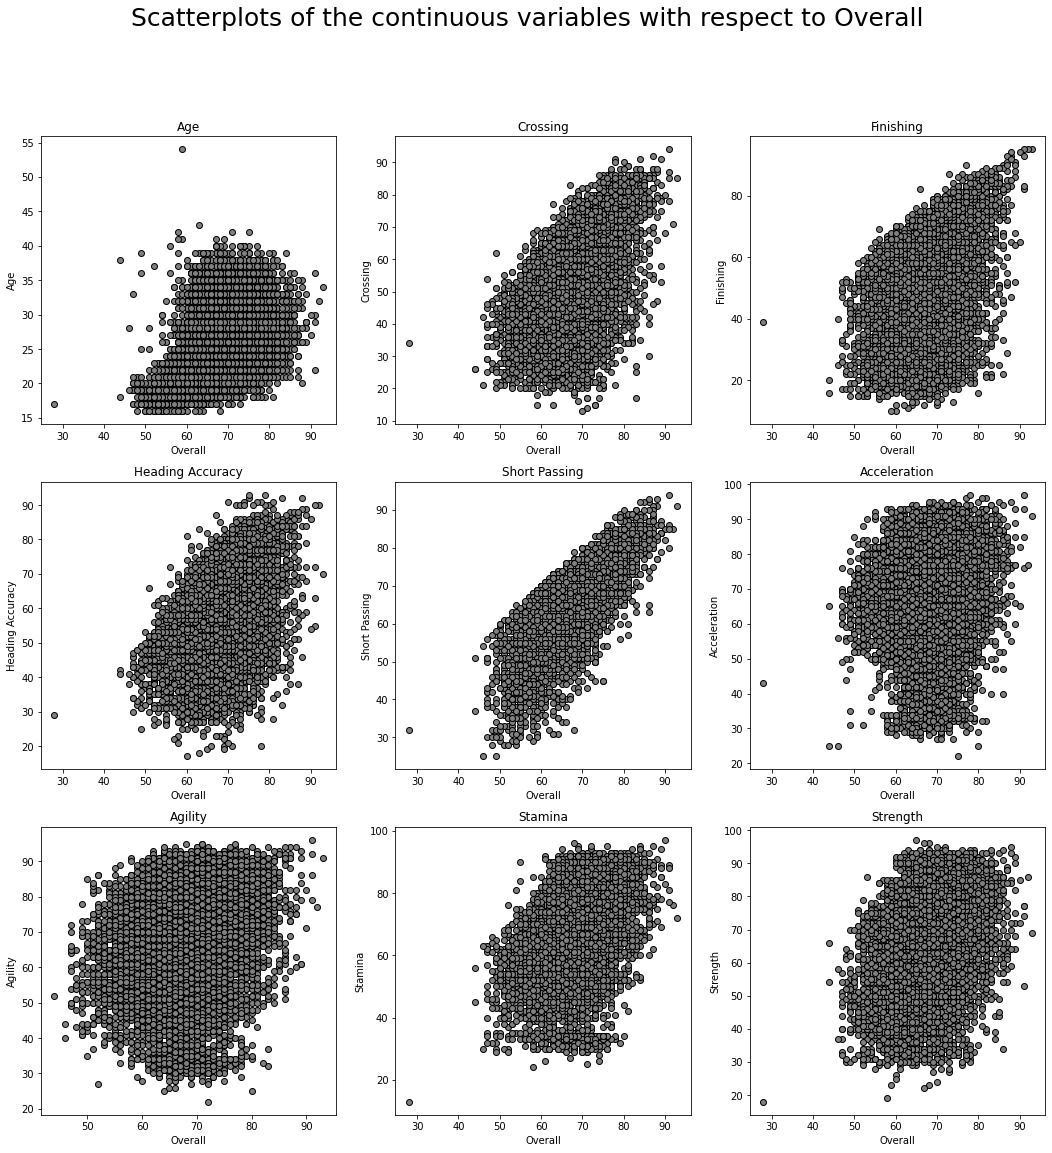

In [20]:
fig = plt.figure(figsize=(18,18))

fig.suptitle('Scatterplots of the continuous variables with respect to Overall', fontsize=25)

ax = fig.add_subplot(3, 3, 1)
ax.set_title("Age")
plt.scatter(fifa2['Overall'], fifa2['Age'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Age')

ax = fig.add_subplot(3, 3, 2)
ax.set_title("Crossing")
plt.scatter(fifa2['Overall'], fifa2['Crossing'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Crossing')

ax = fig.add_subplot(3, 3, 3)
ax.set_title("Finishing")
plt.scatter(fifa2['Overall'], fifa2['Finishing'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Finishing')

ax = fig.add_subplot(3, 3, 4)
ax.set_title("Heading Accuracy")
plt.scatter(fifa2['Overall'], fifa2['HeadingAccuracy'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Heading Accuracy')

ax = fig.add_subplot(3, 3, 5)
ax.set_title("Short Passing")
plt.scatter(fifa2['Overall'], fifa2['ShortPassing'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Short Passing')

ax = fig.add_subplot(3, 3, 6)
ax.set_title("Acceleration")
plt.scatter(fifa2['Overall'], fifa2['Acceleration'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Acceleration')

ax = fig.add_subplot(3, 3, 7)
ax.set_title("Agility")
plt.scatter(fifa2['Overall'], fifa2['Agility'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Agility')

ax = fig.add_subplot(3, 3, 8)
ax.set_title("Stamina")
plt.scatter(fifa2['Overall'], fifa2['Stamina'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Stamina')

ax = fig.add_subplot(3, 3, 9)
ax.set_title("Strength")
plt.scatter(fifa2['Overall'], fifa2['Strength'], color = 'grey', edgecolor = 'black')
ax.set_xlabel('Overall')
ax.set_ylabel('Strength')



In [21]:
resettest = smd.linear_reset(res=reg1, power=2, test_type="fitted", use_f=True)
print(resettest)

<F test: F=243.14075476170152, p=2.155852300570797e-54, df_denom=1.51e+04, df_num=1>


C:\Users\filsz\miniconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]
